In [100]:
import pandas as pd
import numpy as np

In [101]:
df=pd.read_csv("Sep_aggregated_Data.csv")

In [102]:
#Fill NaN
X=df.copy()
cols=['#Tickets', 'First response time hours', 'Resolution time hours', '%Escalated', '%AgentResponse', '%ResolutioneSLA_Violated', '%FirstResponseSLA_Violated',
 '%HigherPriorityTickets', '%TypeComplaint', '%FCRNo', 'total_shipments_x', 'attempted_shipment_per', 'rto_per', 'ndr_per', 'ndr_rto_per',
 'deliveries_exceeding_edd_per', 'wt_discrepancy_shipments_per', 'auto_accept_shipments_per', 'seller_accepted_shipments_per', 'wt_dispute_shipments_per',
 'seller_favored_shipments_per', 'no_dispute_seller_favored_shipments_per', 'courier_favored_shipments_per', 'wt_dispute_pending_per',     'first_attempt_sla_breach_per',     'delivery_sla_breach_per']
X[cols]=X[cols].fillna(0)

In [103]:
#handle nan, seperately
cols2=['Avg_NPS_Score',
 'Latest_NPS_Score',
'weight_score',
 'current_usable_balance',
 'avg_available_balance',
 'avg_used_balance',
 'avg_onhold_balance',
 'latest_available_balance',
 'latest_used_balance',
 'latest_onhold_balance']
X_subs=X.drop(cols2,axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X['%AgentResponse']=X['%AgentResponse'].fillna(1) #To fill the ones where customer response is 0, but agent interaction is there

In [104]:
from sklearn.feature_selection import f_classif, chi2
from sklearn.feature_selection import SelectKBest

In [105]:
fs = SelectKBest(score_func=f_classif, k=10)

In [106]:
# X_subs.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_subs['%AgentResponse']=X_subs['%AgentResponse'].fillna(1) #To fill the ones where customer response is 0, but agent interaction is there
# np.isfinite(X_subs2).all()

In [107]:
X_subs2=X.copy()
# X_subs2.fillna(df.mean())
y2=X_subs2['churned']
X_subs2.drop(['churned','final_rating','total_shipments_y','Company ID'],axis=1,inplace=True)
X_subs2=X_subs2.fillna(X_subs2.mean())

In [108]:
# from sklearn.feature_selection import SelectFpr
# fs_fpr = SelectFpr(f_classif)
# X_fpr=fs_fpr.fit_transform(X_subs2, y2)
# mask_fpr=fs_fpr.get_support().tolist()
# d_fpr={'Features':X_subs2.columns.tolist(),'TopK':mask_fpr,'scores':fs_fpr.scores_.tolist()}
# result_df_fpr = pd.DataFrame(d_fpr)
# result_df_fpr.sort_values('scores',ascending=False)

In [109]:
# F_Classif: Top K features
X_selected2 = fs.fit_transform(X_subs2, y2)
mask2=fs.get_support().tolist()
d2={'Features':X_subs2.columns.tolist(),'TopK':mask2,'scores':fs.scores_.tolist()}
result_df2 = pd.DataFrame(d2)
result_df2.sort_values('scores',ascending=False).head(15)

,Features,TopK,scores
13,attempted_shipment_per,True,5788.689060
25,first_attempt_sla_breach_per,True,5002.612403
24,deliveries_exceeding_edd_per,True,1020.693157
27,wt_discrepancy_shipments_per,True,828.303802
26,delivery_sla_breach_per,True,698.737381
15,ndr_per,True,630.631415
4,%AgentResponse,True,518.516836
5,%ResolutioneSLA_Violated,True,510.068884
2,Resolution time hours,True,503.365799
6,%FirstResponseSLA_Violated,True,423.662195


In [110]:
X_corr=X.copy()
X_corr=X_corr.fillna(X_corr.mean())
X_corr.drop(['final_rating','total_shipments_y','Company ID'],axis=1,inplace=True)

In [111]:
# mask3 = fs.get_support() #list of booleans
# new_features = [] # The list of your K best features
# feature_names=list(X_subs2.columns.values)
# for bool, feature in zip(mask3, feature_names):
#     if bool:
#         new_features.append(feature)
# new_features

In [112]:
# y=X_subs['churned']
# X_subs.drop(['churned','final_rating','total_shipments_y'],axis=1,inplace=True)

In [113]:
# np.isfinite(X_subs).all()

In [114]:
# X_subs.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_subs['%AgentResponse']=X_subs['%AgentResponse'].fillna(1)
# X_selected = fs.fit_transform(X_subs, y)
# mask=fs.get_support().tolist()
# d={'Features':X_subs.columns.tolist(),'TopK':mask,'scores':fs.scores_.tolist()}
# result_df = pd.DataFrame(d)
# result_df.sort_values('scores',ascending=False)

In [115]:
X_subs_chi=X_subs2.drop(['current_usable_balance',
'avg_available_balance',
'avg_used_balance',
'latest_available_balance',
'latest_used_balance'],axis=1)

In [116]:
#Chi2 test: Top values
fs_chi = SelectKBest(score_func=chi2,k=10)
X_clf_new= fs_chi.fit_transform(X_subs_chi, y2)
mask_chi=fs_chi.get_support().tolist()
df_Chi={'Features':X_subs_chi.columns.tolist(),'TopK':mask_chi,'scores':fs_chi.scores_.tolist()}
result_df_chi = pd.DataFrame(df_Chi)
result_df_chi.sort_values('scores',ascending=False).head(15)

,Features,TopK,scores
36,avg_onhold_balance,True,962345.916956
37,latest_onhold_balance,True,234348.983033
12,total_shipments_x,True,203696.184007
13,attempted_shipment_per,True,123379.185382
25,first_attempt_sla_breach_per,True,112946.996228
24,deliveries_exceeding_edd_per,True,44359.660771
4,%AgentResponse,True,38446.306657
27,wt_discrepancy_shipments_per,True,36465.195258
26,delivery_sla_breach_per,True,30104.494992
5,%ResolutioneSLA_Violated,True,29449.137295


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_subs2, y2)
# clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_subs2)
# X_new.shape

In [118]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
selected_feat= X_subs2.columns[(model.get_support())]
selected_feat.values.tolist()

Feature ranking:


['Resolution time hours',
 'total_shipments_x',
 'avg_delivered_days',
 'avg_first_delivery_days',
 'deliveries_exceeding_edd_per',
 'weight_score',
 'current_usable_balance',
 'avg_available_balance',
 'avg_used_balance',
 'latest_available_balance',
 'latest_used_balance']

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# #correlation matrix
# cor = X_corr.corr()
# plt.figure(figsize=(50,20))
# sns.heatmap(cor, annot = True)

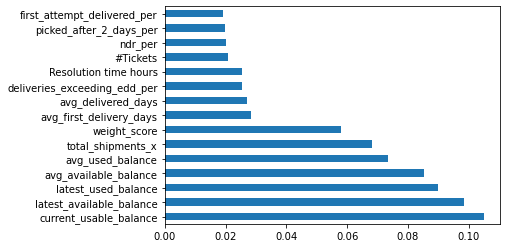

In [120]:
feat_importances = pd.Series(clf.feature_importances_, index=X_subs2.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [121]:
# from skfeature.function.similarity

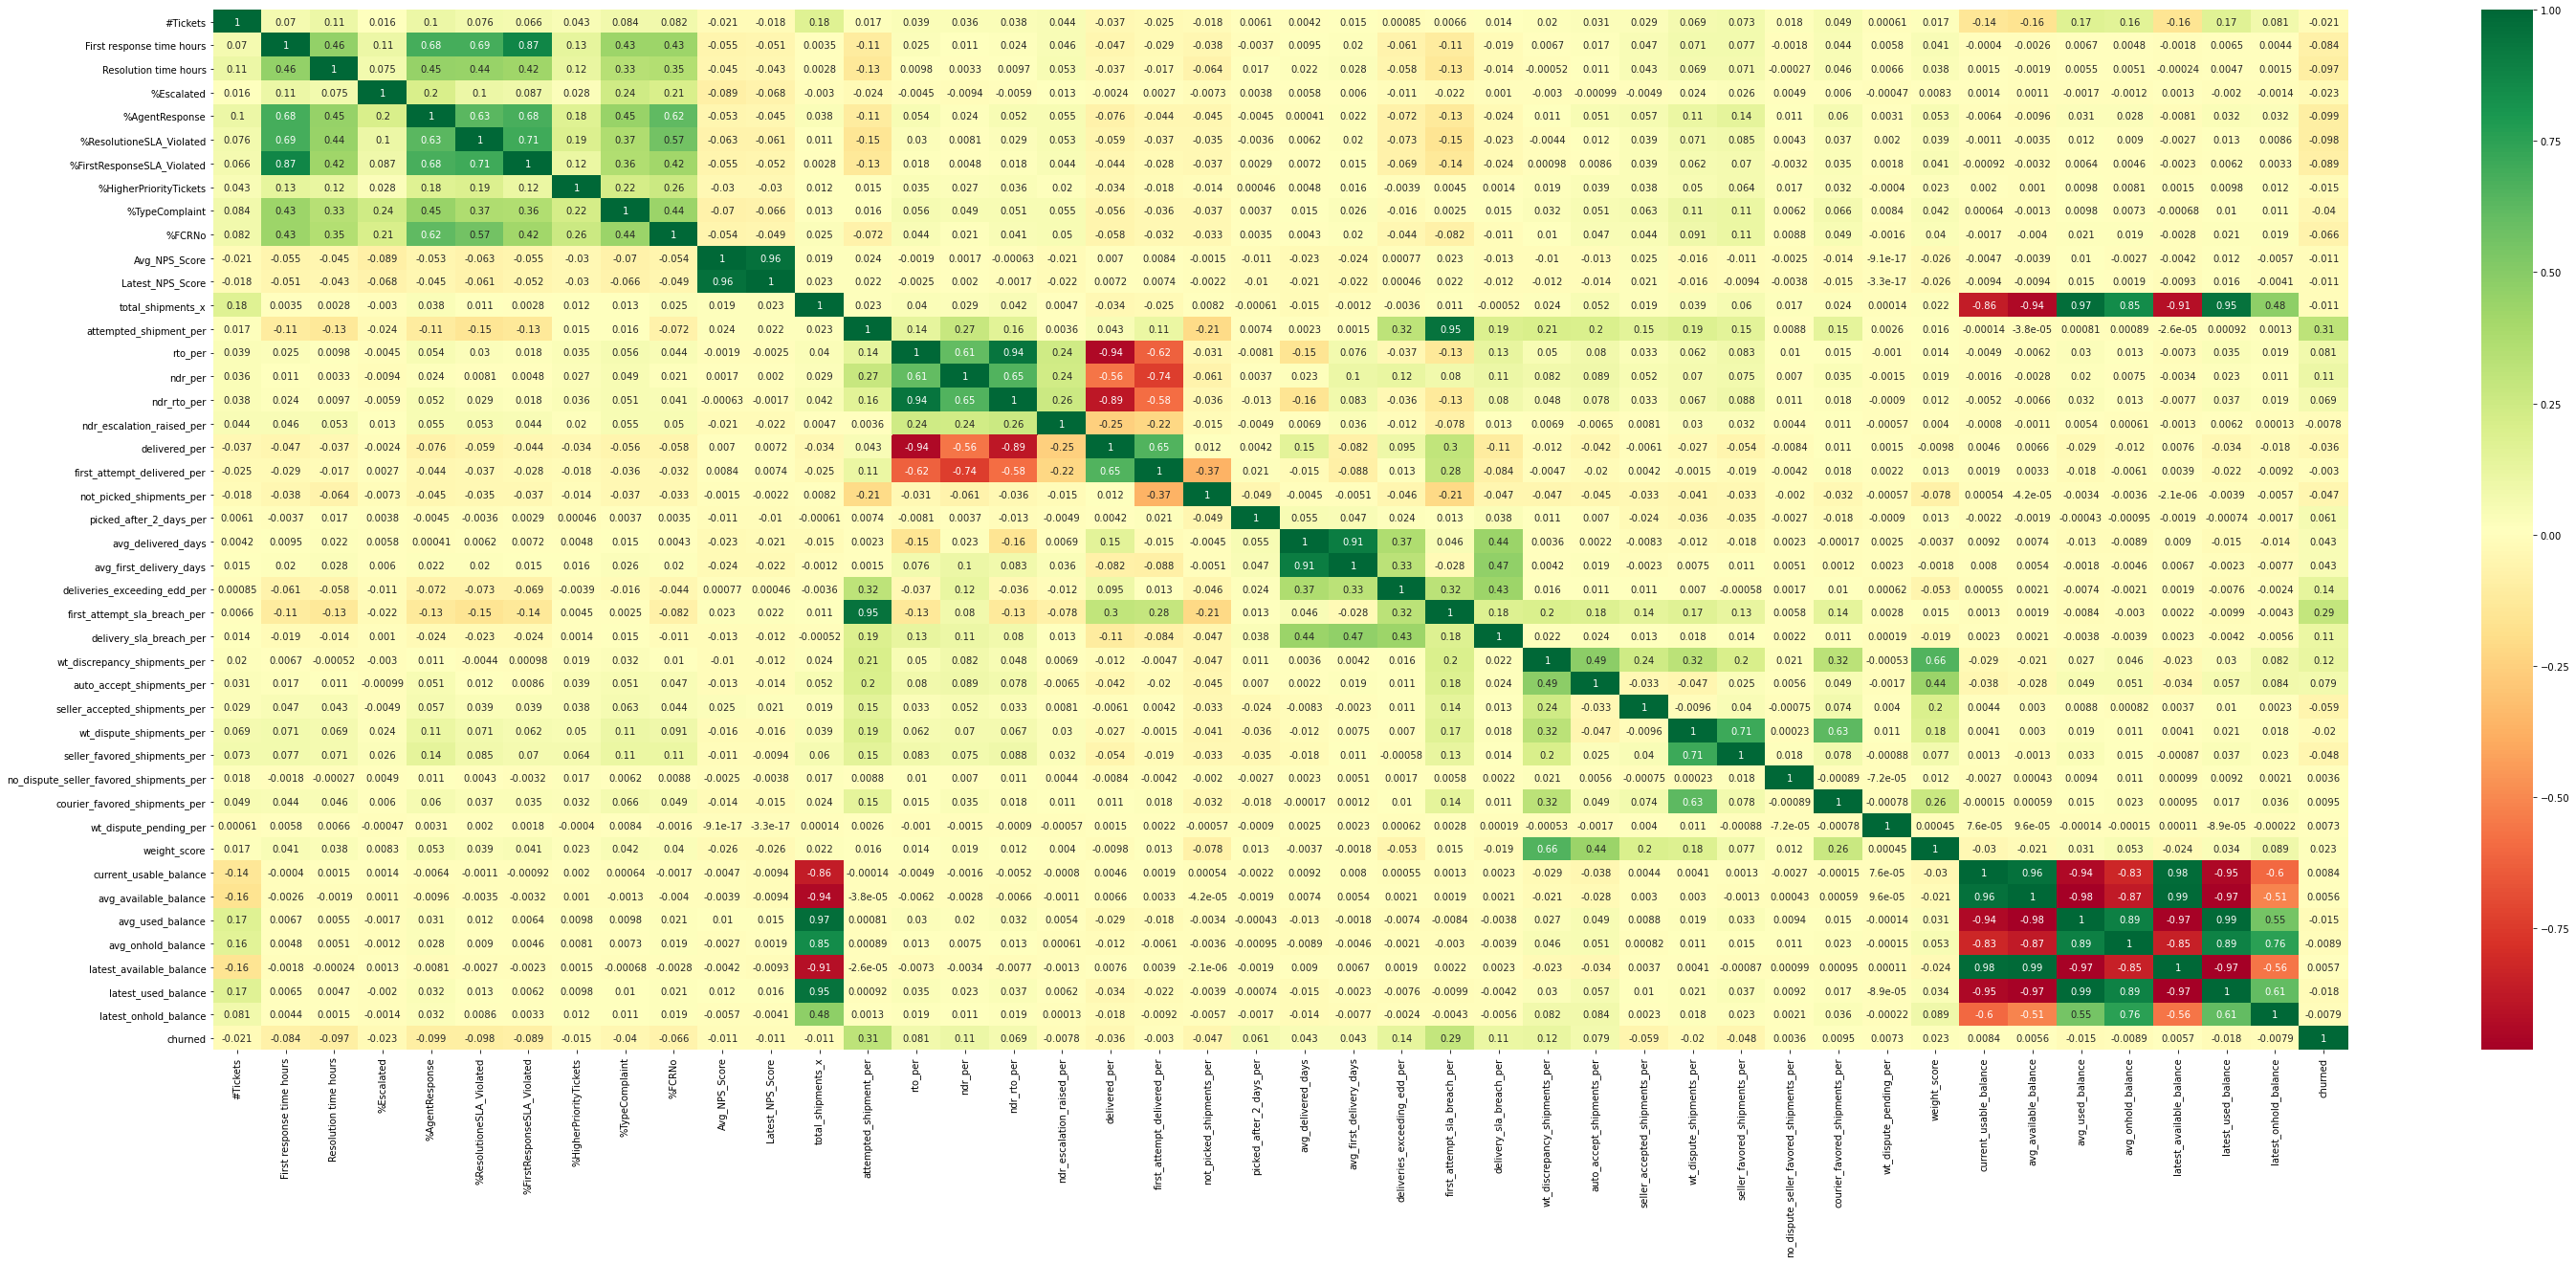

In [122]:
corrmat = X_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,20))
#plot heat map
g=sns.heatmap(X_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [123]:
c = X_corr.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
df_corr_values = pd.DataFrame(s)
df_corr_values.reset_index(inplace=True)

In [124]:
# Correlation matrix: Top K features
churned_corr_coefs = df_corr_values[df_corr_values['level_0']=='churned']
churned_corr_coefs.columns= ['level_0', 'Features', 'Score']
churned_corr_coefs.drop('level_0',axis=1,inplace=True)
churned_corr_coefs = churned_corr_coefs[churned_corr_coefs['Features']!='churned']
churned_corr_coefs.sort_values('Score',ascending=False).head(15)

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Features,Score
1905,attempted_shipment_per,0.314559
1917,first_attempt_sla_breach_per,0.294407
1916,deliveries_exceeding_edd_per,0.137823
1919,wt_discrepancy_shipments_per,0.124379
1918,delivery_sla_breach_per,0.114376
1907,ndr_per,0.108728
1896,%AgentResponse,0.098694
1897,%ResolutioneSLA_Violated,0.097895
1894,Resolution time hours,0.097256
1898,%FirstResponseSLA_Violated,0.089291


In [125]:
#Aggregated sheet
list_fclassif = result_df2.sort_values('scores',ascending=False).head(15)['Features'].tolist()
list_chi2 = result_df_chi.sort_values('scores',ascending=False).head(15)['Features'].tolist()
list_tree = feat_importances.nlargest(15).index.tolist()
list_corr_matrix = churned_corr_coefs.sort_values('Score',ascending=False).head(15)['Features'].tolist()
list_fclassif.sort()
list_chi2.sort()
list_tree.sort()
list_corr_matrix.sort()
All_features={'fclassif':list_fclassif,'chi2':list_chi2,'tree_based':list_tree,
              'list_corr_matrix':list_corr_matrix}
df_all_features = pd.DataFrame(All_features)
df_all_features

,fclassif,chi2,tree_based,list_corr_matrix
0,%AgentResponse,%AgentResponse,#Tickets,%AgentResponse
1,%FCRNo,%FirstResponseSLA_Violated,Resolution time hours,%FCRNo
2,%FirstResponseSLA_Violated,%ResolutioneSLA_Violated,avg_available_balance,%FirstResponseSLA_Violated
3,%ResolutioneSLA_Violated,attempted_shipment_per,avg_delivered_days,%ResolutioneSLA_Violated
4,First response time hours,auto_accept_shipments_per,avg_first_delivery_days,First response time hours
5,Resolution time hours,avg_onhold_balance,avg_used_balance,Resolution time hours
6,attempted_shipment_per,deliveries_exceeding_edd_per,current_usable_balance,attempted_shipment_per
7,auto_accept_shipments_per,delivery_sla_breach_per,deliveries_exceeding_edd_per,auto_accept_shipments_per
8,deliveries_exceeding_edd_per,first_attempt_sla_breach_per,first_attempt_delivered_per,deliveries_exceeding_edd_per
9,delivery_sla_breach_per,latest_onhold_balance,latest_available_balance,delivery_sla_breach_per


In [126]:
common_features = set(list_fclassif).intersection(list_chi2, list_tree, list_corr_matrix)
common_features

{'deliveries_exceeding_edd_per', 'ndr_per'}

In [127]:
#Common Features excluding tree
abc = set(list_fclassif).intersection(list_corr_matrix,list_chi2)
abc

{'%AgentResponse',
 '%FirstResponseSLA_Violated',
 '%ResolutioneSLA_Violated',
 'attempted_shipment_per',
 'auto_accept_shipments_per',
 'deliveries_exceeding_edd_per',
 'delivery_sla_breach_per',
 'first_attempt_sla_breach_per',
 'ndr_per',
 'rto_per',
 'wt_discrepancy_shipments_per'}

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [129]:
# # RFE feature extraction
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model, 10)
# fit = rfe.fit(X_subs2, y2)
# print("Num Features: %d" % fit.n_features_)
# print("Selected Features: %s" % fit.support_)
# print("Feature Ranking: %s" % fit.ranking_)

In [130]:
# # X_subs2[(fit.support_)]
# X_subs2.columns[(fit.support_)]

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score

In [132]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_subs2, y2, test_size=0.25, random_state=0)

In [134]:
# #Normal Logistic Regression
# logisticRegr = LogisticRegression()
# logisticRegr.fit(x_train, y_train)
# score = logisticRegr.score(x_test, y_test)
# y_pred = logisticRegr.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_test, y_pred,beta=1.5)}')

In [135]:
# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 10);

In [136]:
# print('Mean ROC AUC: %.3f' % mean(scores))

In [137]:
# # Weighted Logistic regression
# w = {0:26, 1:74}
# lg2 = LogisticRegression(random_state=13, class_weight=w)
# # fit it
# lg2.fit(x_train,y_train)
# y_pred = lg2.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(lg2, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
# print(f'F0.5 Score: {fbeta_score(y_test, y_pred,beta=1.5)}')

In [138]:
# # Normalised Weighted Logistic regression
# w = {0:26, 1:74}
# lg2 = LogisticRegression(random_state=13, class_weight=w)
# # fit it
# lg2.fit(x_train_norm,y_train_norm)
# y_pred_norm = lg2.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred_norm)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred_norm)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred_norm)}')
# print(f'Recall score: {recall_score(y_test_norm,y_pred_norm)}')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(lg2, x_train_norm, y_train_norm, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred_norm,beta=1.5)}')

In [139]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(lg2, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [140]:
# # define weight hyperparameter
# # w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
# #      {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
# #      {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
# #      {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
# #      {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
# #      {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
# #      {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
# #      {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
# #      {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
# #      {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
# w = [{0:10,1:90},{0:20,1:80},{0:30,1:70}, {0:40,1:60}, 
#      {0:50,1:50.0}, {0:40,1:60.0}, {0:70,1:30.0}, {0:80,1:20.0}, 
#      {0:25,1:75.0}, {0:35,1:75.0}, {0:45,1:55.0}, {0:10,1:1.0}]
# hyperparam_grid = {"class_weight": w }

In [141]:
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

In [142]:
# # define model
# lg3 = LogisticRegression(random_state=13)
# # define evaluation procedure
# grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
# grid.fit(x_train,y_train)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [143]:
# # define model
# lg4 = LogisticRegression(random_state=13,C=13.0,fit_intercept=True, penalty='l2',class_weight={0: 50, 1: 50.0} )
# # fit it
# lg4.fit(x_train,y_train)
# # test
# y_pred = lg4.predict(x_test)
# # performance
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test,y_pred)}')


In [144]:
# model = RandomForestClassifier(n_estimators=10)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# #print('Mean ROC AUC: %.3f' % mean(scores))

In [145]:
# #Normal RandomForestClassifier
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_test, y_pred,beta=1.5)}')

In [146]:
# #Normal RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100,class_weight={0:25,1:75})
# model.fit(x_train_norm,y_train_norm)
# y_pred = model.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test_norm,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred,beta=1.5)}')

In [147]:
# scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [148]:
#normalisation
from sklearn import preprocessing
x = X_subs2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.columns=X_subs2.columns

In [149]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y2, test_size=0.25, random_state=0)

In [150]:
# #Linear SVC feature ranking
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel
# clf_svc = LinearSVC()
# clf_svc = clf_svc.fit(X_subs2, y2)
# model_svc = SelectFromModel(clf_svc, prefit=True)
# print("Feature ranking:")
# selected_feat_svc= X_norm.columns[(model_svc.get_support())]
# selected_feat_svc.values.tolist()

In [151]:
# #Normalised Linear SVC feature ranking
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel
# clf_svc = LinearSVC()
# clf_svc = clf_svc.fit(X_norm, y2)
# model_svc = SelectFromModel(clf_svc, prefit=True)
# print("Feature ranking:")
# selected_feat_svc= X_norm.columns[(model_svc.get_support())]
# selected_feat_svc.values.tolist()

In [152]:
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC

In [153]:
# #Normalised Weighted Random forestClassifier: Pipeline 
# clf_pip = RandomForestClassifier(n_estimators=50, class_weight={0:1000,1:10})
# clf_pip.fit(x_train_norm, y_train_norm)
# y_pred_norm = clf_pip.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred_norm)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred_norm)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred_norm)}') # 0.5
# print(f'Recall score: {recall_score(y_test_norm,y_pred_norm)}')
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred_norm,beta=1.5)}')

In [154]:
# from sklearn.ensemble import GradientBoostingClassifier
# clf_pip = GradientBoostingClassifier(n_estimators=2000)
# clf_pip.fit(x_train_norm, y_train_norm)
# y_pred_norm = clf_pip.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred_norm)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred_norm)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred_norm)}') # 0.5
# print(f'Recall score: {recall_score(y_test_norm,y_pred_norm)}')
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred_norm,beta=1.5)}')


In [155]:
# model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [156]:
# #Weighted Random forestClassifier: Pipeline 
# clf_pip = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC())),
#   ('classification', RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample'))
# ])
# clf_pip.fit(x_test, y_test)
# y_pred = clf_pip.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_test, y_pred,beta=1.5)}')

In [157]:
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test,y_pred)}')

In [158]:
# from imblearn.ensemble import BalancedRandomForestClassifier
# model = BalancedRandomForestClassifier(n_estimators=10)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, x_train_norm, y_train_norm, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [159]:
# model.fit(x_train,y_train)
# y_pred_norm = model.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred_norm)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred_norm)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred_norm)}') # 0.5
# print(f'Recall score: {recall_score(y_test_norm,y_pred_norm)}')
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred_norm,beta=1.5)}')

In [160]:
# from imblearn.ensemble import EasyEnsembleClassifier
# # generate dataset
# model = EasyEnsembleClassifier(n_estimators=10)
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, x_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

In [161]:
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test,y_pred)}')

In [162]:
df_oct=pd.read_csv("Oct_aggregated_Data.csv")

In [163]:
#Fill NaN
X_oct=df_oct.copy()
cols=['#Tickets', 'First response time hours', 'Resolution time hours', '%Escalated', '%AgentResponse', '%ResolutioneSLA_Violated', '%FirstResponseSLA_Violated',
 '%HigherPriorityTickets', '%TypeComplaint', '%FCRNo', 'total_shipments_x', 'attempted_shipment_per', 'rto_per', 'ndr_per', 'ndr_rto_per',
 'ndr_escalation_raised_per', 'delivered_per', 'first_attempt_delivered_per', 'not_picked_shipments_per', 'picked_after_2_days_per', 'avg_delivered_days', 'avg_first_delivery_days',
 'deliveries_exceeding_edd_per', 'wt_discrepancy_shipments_per', 'auto_accept_shipments_per', 'seller_accepted_shipments_per', 'wt_dispute_shipments_per',
 'seller_favored_shipments_per', 'no_dispute_seller_favored_shipments_per', 'courier_favored_shipments_per', 'wt_dispute_pending_per',     'first_attempt_sla_breach_per','delivery_sla_breach_per']
X_oct[cols]=X_oct[cols].fillna(0)

In [164]:
# X_oct.describe()

In [165]:
X_oct.replace([np.inf, -np.inf], np.nan, inplace=True)
X_oct['%AgentResponse']=X_oct['%AgentResponse'].fillna(1) #To fill the ones where customer response is 0, but agent interaction is there
X_oct=X_oct.fillna(X_oct.mean())


In [166]:
y_oct = X_oct['churned']
# df_companies=X_oct['Company ID']
cids=X_oct['Company ID'].values.tolist()
X_oct.drop(['churned','final_rating','total_shipments_y','Company ID'],axis=1,inplace=True)
x_oct = X_oct.copy()

In [167]:
y_oct.sum()

15855

In [168]:
#Normalised for October
x_oct_norm = x_oct.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_oct_scaled = min_max_scaler.fit_transform(x_oct_norm)
X_oct_norm = pd.DataFrame(x_oct_scaled)
X_oct_norm.columns=x_oct.columns

In [169]:
#Training XGBoost
from xgboost import XGBClassifier
from collections import Counter
counter = Counter(y2)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
model = XGBClassifier(scale_pos_weight=estimate)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_norm, y2, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.5f' % mean(scores))
model.fit(x_train_norm, y_train_norm)
y_pred = model.predict(x_test_norm)
print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test_norm,y_pred)}')
print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred,beta=1.5)}')

C:\Users\abc\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7693299946885196
Confusion Matrix: 
[[7605 2186]
 [ 854 2534]]
Area Under Curve: 0.7623338096801667
Recall score: 0.7479338842975206
F0.5 Score: 0.6672202868022359


In [170]:
# Training using October's data
# model.fit(x_train_oct_norm, y_train_oct_norm)
y_pred = model.predict(X_oct_norm)
print(f'Accuracy Score: {accuracy_score(y_oct,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_oct, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_oct, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_oct,y_pred)}')
print(f'F0.5 Score: {fbeta_score(y_oct, y_pred,beta=1.5)}')

Accuracy Score: 0.5805587997484503
Confusion Matrix: 
[[17803 21997]
 [ 1347 14508]]
Area Under Curve: 0.6811770655548319
Recall score: 0.915042573320719
F0.5 Score: 0.6532532081810782


In [171]:
# x_train_oct_norm, x_test_oct_norm, y_train_oct_norm, y_test_oct_norm = train_test_split(X_oct_norm, y_oct, test_size=0.25, random_state=0)

In [172]:
# df_companies

In [173]:
# #Normalised Weighted Random forestClassifier: Pipeline 
# rf_n_clf = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC())),
#   ('classification', RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample'))
# ])
# rf_n_clf.fit(x_train_norm, y_train_norm)
# y_pred_norm = rf_n_clf.predict(x_test_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_norm,y_pred_norm)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_norm, y_pred_norm)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_norm, y_pred_norm)}') # 0.5
# print(f'Recall score: {recall_score(y_test_norm,y_pred_norm)}')
# print(f'F0.5 Score: {fbeta_score(y_test_norm, y_pred_norm,beta=1.5)}')

In [174]:
# y_pred = rf_n_clf.predict(x_oct)
# print(f'Accuracy Score: {accuracy_score(y_oct,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_oct, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_oct, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_oct,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_oct, y_pred,beta=1.5)}')

In [175]:
# #Weighted Random forestClassifier: Pipeline 
# clf_pip = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC())),
#   ('classification', RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample'))
# ])
# clf_pip.fit(x_train, y_train)
# y_pred = clf_pip.predict(x_oct)
# print(f'Accuracy Score: {accuracy_score(y_oct,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_oct, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_oct, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_oct,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_oct, y_pred,beta=1.5)}')

In [176]:
# #Training using October's data
# counter = Counter(y_oct)
# # estimate scale_pos_weight value
# estimate = counter[0] / counter[1]
# model = XGBClassifier(scale_pos_weight=estimate)
# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # scores = cross_val_score(model, X_norm, y2, scoring='roc_auc', cv=cv, n_jobs=-1)
# # print('Mean ROC AUC: %.5f' % mean(scores))
# model.fit(x_train_oct_norm, y_train_oct_norm)
# y_pred = model.predict(x_test_oct_norm)
# print(f'Accuracy Score: {accuracy_score(y_test_oct_norm,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test_oct_norm, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test_oct_norm, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_test_oct_norm,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_test_oct_norm, y_pred,beta=1.5)}')

In [177]:
df_nov=pd.read_csv("Nov_aggregated_Data.csv")

In [178]:
#Fill NaN
X_nov=df_nov.copy()
cols=['#Tickets', 'First response time hours', 'Resolution time hours', '%Escalated', '%AgentResponse', '%ResolutioneSLA_Violated', '%FirstResponseSLA_Violated',
 '%HigherPriorityTickets', '%TypeComplaint', '%FCRNo', 'total_shipments_x', 'attempted_shipment_per', 'rto_per', 'ndr_per', 'ndr_rto_per',
 'ndr_escalation_raised_per', 'delivered_per', 'first_attempt_delivered_per', 'not_picked_shipments_per', 'picked_after_2_days_per', 'avg_delivered_days', 'avg_first_delivery_days',
 'deliveries_exceeding_edd_per', 'wt_discrepancy_shipments_per', 'auto_accept_shipments_per', 'seller_accepted_shipments_per', 'wt_dispute_shipments_per',
 'seller_favored_shipments_per', 'no_dispute_seller_favored_shipments_per', 'courier_favored_shipments_per', 'wt_dispute_pending_per',     'first_attempt_sla_breach_per','delivery_sla_breach_per']
X_nov[cols]=X_nov[cols].fillna(0)
X_nov.replace([np.inf, -np.inf], np.nan, inplace=True)
X_nov['%AgentResponse']=X_nov['%AgentResponse'].fillna(1) #To fill the ones where customer response is 0, but agent interaction is there
X_nov=X_nov.fillna(X_nov.mean())
y_nov = X_nov['churned']
# df_companies=X_oct['Company ID']
cids=X_nov['Company ID'].values.tolist()
X_nov.drop(['churned','final_rating','total_shipments_y','Company ID'],axis=1,inplace=True)
x_nov = X_nov.copy()
#Normalised for October
x_nov_norm = x_nov.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_nov_scaled = min_max_scaler.fit_transform(x_nov_norm)
X_nov_norm = pd.DataFrame(x_nov_scaled)
X_nov_norm.columns=x_nov.columns

In [179]:
# Training using October's data
# model.fit(x_train_oct_norm, y_train_oct_norm)
y_pred = model.predict(X_nov_norm)
print(f'Accuracy Score: {accuracy_score(y_nov,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_nov, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_nov, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_nov,y_pred)}')
print(f'F0.5 Score: {fbeta_score(y_nov, y_pred,beta=1.5)}')

Accuracy Score: 0.557462554372429
Confusion Matrix: 
[[12219 20958]
 [ 1526 16104]]
Area Under Curve: 0.6408701546498113
Recall score: 0.9134429948950652
F0.5 Score: 0.6821105311516431


In [180]:
# y_pred = model.predict(X_nov_norm)
# print(f'Accuracy Score: {accuracy_score(y_nov,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_nov, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_nov, y_pred)}') # 0.5
# print(f'Recall score: {recall_score(y_nov,y_pred)}')
# print(f'F0.5 Score: {fbeta_score(y_nov, y_pred,beta=1.5)}')

In [181]:
d = {'company_id':cids,'Churned':y_pred}
df_comp = pd.DataFrame(d, columns=['company_id','Churned'])

In [182]:
df_names=pd.read_csv("Shipments_12monthSummary.csv")
df_names=df_names[['company_id','company_name','tier']]
df_final = df_names.merge(df_comp,on='company_id')
df_final=df_final[df_final['Churned']==1]
df_final.drop('Churned',axis=1,inplace=True)
df_final

,company_id,company_name,tier
0,589964,Kruti Creation,BRONZE
1,826928,Yash Tejwani,BRONZE
3,716677,Kukreja's - Chemist & Druggist,BRONZE
4,587292,Kangra Valley,BRONZE
5,1006098,FUTURE LED,BRONZE
...,...,...,...
45083,579288,sarte-woman,BRONZE
45084,482564,CYLUS CREATORS PRIVATE LIMITED,BRONZE
45085,383290,Minimax Enterprises,NAM-BRONZE
45086,222726,UMP Overseas,BRONZE


In [2]:
# df_final.to_csv('Predicted_Churned_sellers.csv',index=False)